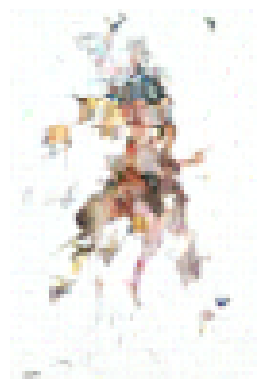

Corrected and saved: coolGeneratedImages/Faerie.png


In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Resize
import einx


def fixPossiblyMalformedFile(imgFilePath):
    im = Image.open(imgFilePath)
    arr = np.array(im)

    # A "correct" image must be exactly 96 rows × 64 cols
    malformed = arr.shape[0] != 96 or arr.shape[1] != 64

    if malformed:
        # Crop then resize
        arr = arr[15:-35, 39:-10]  # crop region
        img = Image.fromarray(arr)

        # Resize with nearest neighbor
        resized = img.resize((64, 96), Image.NEAREST)

        # Back to numpy
        resized_arr = np.array(resized)

        # Show
        plt.imshow(resized_arr)
        plt.axis("off")              # removes axes ticks and labels
        plt.gca().set_frame_on(False)
        plt.show()

        # Save back to original path (overwrites!)
        resized.save(imgFilePath)
        print(f"Corrected and saved: {imgFilePath}")
    else:
        print("Image already correct — no changes made.")
possiblyMalformedFilePath = "coolGeneratedImages/Faerie.png"

fixPossiblyMalformedFile(possiblyMalformedFilePath)

# TODO: Iterate through all pngs in coolGeneratedImages and fix them if malformed

Checking coolGeneratedImages/6HoursTraining-HaloAlienGunslinger.png...
Image already correct — no changes made.
Checking coolGeneratedImages/6HoursTraining-HighFantasy.png...
Image already correct — no changes made.
Checking coolGeneratedImages/6HoursTraining-HighTemplar.png...
Image already correct — no changes made.
Checking coolGeneratedImages/6HoursTraining-InterestingLearnedTraits.png...
Image already correct — no changes made.
Checking coolGeneratedImages/6HoursTraining-LongHair.png...
Image already correct — no changes made.
Checking coolGeneratedImages/6HoursTraining-MonsterHunteryArmor.png...
Image already correct — no changes made.
Checking coolGeneratedImages/8HoursTraining-1.png...
Image already correct — no changes made.
Checking coolGeneratedImages/Dancer.png...


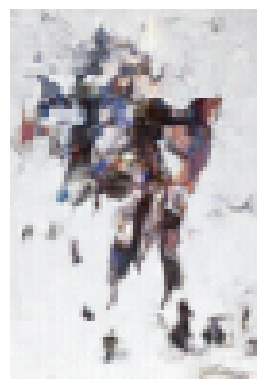

Corrected and saved: coolGeneratedImages/Dancer.png
Checking coolGeneratedImages/EssenceOfMagic.png...


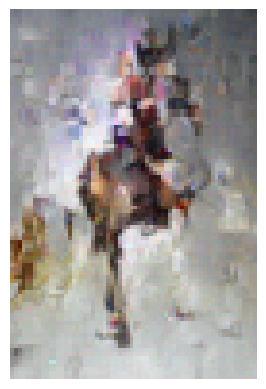

Corrected and saved: coolGeneratedImages/EssenceOfMagic.png
Checking coolGeneratedImages/Faerie.png...
Image already correct — no changes made.
Checking coolGeneratedImages/ManWithAShadow.png...


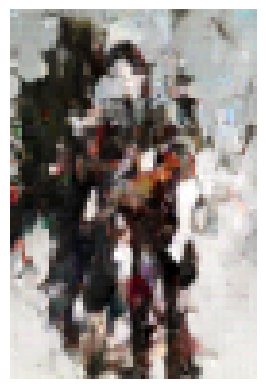

Corrected and saved: coolGeneratedImages/ManWithAShadow.png
Checking coolGeneratedImages/StrongPose.png...


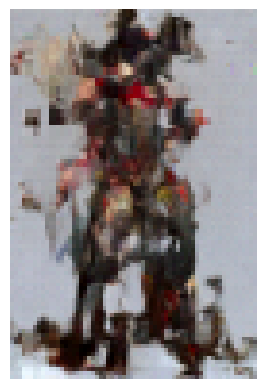

Corrected and saved: coolGeneratedImages/StrongPose.png
Checking coolGeneratedImages/firstCoolGeneration.png...


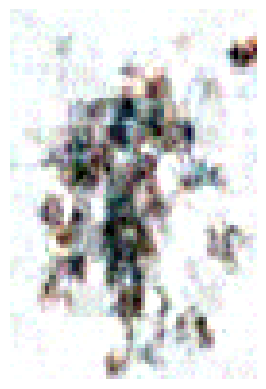

Corrected and saved: coolGeneratedImages/firstCoolGeneration.png
Checking coolGeneratedImages/someHoodedFigure.png...


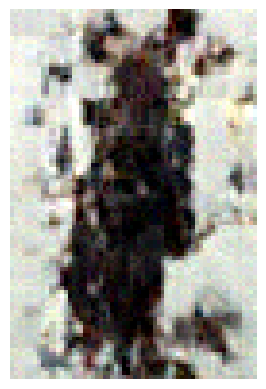

Corrected and saved: coolGeneratedImages/someHoodedFigure.png

Processed 14 files in coolGeneratedImages


In [51]:
from pathlib import Path

def fix_all_in_directory(directory="coolGeneratedImages", pattern="*.png"):
    """
    Iterates through all PNGs in `directory` (non-recursive) and fixes any malformed images.
    """
    dirpath = Path(directory)
    files = sorted(dirpath.glob(pattern))

    for img_path in files:
        print(f"Checking {img_path}...")
        fixPossiblyMalformedFile(img_path)

    print(f"\nProcessed {len(files)} files in {dirpath}")
fix_all_in_directory()